In [1]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout,Flatten
from keras.optimizers import adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:

import cv2
import os
import glob
from tqdm import tqdm 
import matplotlib.pyplot as plt


In [0]:
path1='/content/drive/My Drive/face_oclusion/AFDB_masked_face_dataset'

In [0]:
path2='/content/drive/My Drive/face_oclusion/AFDB_face_dataset'

In [0]:
dir1=os.listdir(path1)
dir2=os.listdir(path2)
IMG_SIZE=64


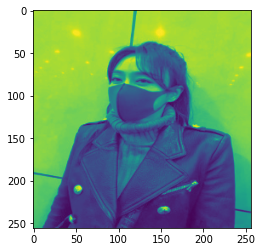

In [58]:
new_path='/content/drive/My Drive/face_oclusion/more/0000000'
try:
    more_face=[]
    class_num=0

    for img in os.listdir(new_path):
            img_array = cv2.imread(os.path.join(new_path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array) 
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            more_face.append([new_array, class_num])
except Exception as e:  
    print(e)


100%|██████████| 139/139 [13:10<00:00,  5.69s/it]


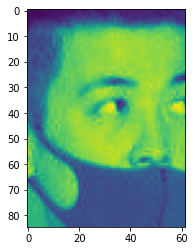

In [12]:
try:
    masked_face=[]
    class_num=0
    for i in tqdm(dir1):
        path = os.path.join(path1,i)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array) 
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            masked_face.append([new_array, class_num])
except Exception as e:  
    print(e)


In [74]:
try:
    uncovered_face=[]
    class_num=1 
    couny=0
    for i in tqdm(dir2) :
        path = os.path.join(path2,i)
        for img in os.listdir(path):  
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                uncovered_face.append([new_array, class_num])
except Exception as e:  
    print(e)
uncovered_face=uncovered_face[6000:]  

100%|██████████| 93/93 [00:28<00:00,  3.21it/s]


In [0]:
training_data=[]
training_data.append(masked_face)
training_data.append(more_face)

training_data.append(uncovered_face)

In [0]:
import numpy as np
x=[]

y = []
for i in training_data:
    for features,label in i:           
            x.append(features)
            y.append(label)
            
x= np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
num_classes=2
y=to_categorical(y,num_classes=  6)



In [84]:
count=0
for i in y :
    if np.argmax(i)==7:
        count+=1
count

0

In [85]:
len(x)

7760

In [87]:


X = x/255.0


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(64, 64, 1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)





Train on 5432 samples, validate on 2328 samples
Epoch 1/10
5432/5432 [==============================] - 415s 76ms/step - loss: 0.2687 - accuracy: 0.8973 - val_loss: 0.8693 - val_accuracy: 0.8926
Epoch 2/10
5432/5432 [==============================] - 415s 76ms/step - loss: 0.0857 - accuracy: 0.9682 - val_loss: 0.9369 - val_accuracy: 0.9265
Epoch 3/10
5432/5432 [==============================] - 408s 75ms/step - loss: 0.0596 - accuracy: 0.9783 - val_loss: 1.0104 - val_accuracy: 0.9338
Epoch 4/10
5432/5432 [==============================] - 413s 76ms/step - loss: 0.0417 - accuracy: 0.9856 - val_loss: 1.3189 - val_accuracy: 0.9270
Epoch 5/10
5432/5432 [==============================] - 416s 77ms/step - loss: 0.0349 - accuracy: 0.9882 - val_loss: 1.6973 - val_accuracy: 0.8720
Epoch 6/10
5432/5432 [==============================] - 412s 76ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 1.4321 - val_accuracy: 0.9274
Epoch 7/10
5432/5432 [==============================] - 414s 76ms/step

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [119]:
model.save('/content/drive/My Drive/face_oclusion/new_face_oclusion_model.h5')
model_file = drive.CreateFile({'title' : '/content/drive/My Drive/face_oclusion/new_face_oclusion_model.h5'})
model_file.SetContentFile('/content/drive/My Drive/face_oclusion/new_face_oclusion_model.h5')
model_file.Upload()

drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1i_gtmB_tQwqc4sz_b_QISup_QIgM_YL4'})

In [120]:
model.save_weights('/content/drive/My Drive/face_oclusion/new_face_oclusion_model_weights.h5')
weights_file = drive.CreateFile({'title' : '/content/drive/My Drive/face_oclusion/new_face_oclusion_model_weights.h5'})
weights_file.SetContentFile('/content/drive/My Drive/face_oclusion/new_face_oclusion_model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1XF-YNiJw1r5-oXfN9MWxRy4XHBU7Kx8b'})

In [0]:
y_pred=[]
y_pred=model.predict(X)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
y[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [170]:
np.argmax(y_pred[1:])

0

In [0]:
def prepare(filepath):
    IMG_SIZE = 64
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  


In [0]:
new_model=keras.models.load_model('/content/drive/My Drive/face_oclusion/new_face_oclusion_model.h5')


In [0]:
new_model.load_weights('/content/drive/My Drive/face_oclusion/new_face_oclusion_model_weights.h5')

In [0]:

prediction = new_model.predict([prepare("/content/drive/My Drive/face_oclusion/AFDB_face_dataset/1 (1)/0_0_zhengkai_0029.jpg")])

In [182]:
np.argmax(prediction)

1

In [0]:
[]